[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1632, 2464)
Epoch 1/40
25/25 [==============================] - 1s 57ms/step - loss: 0.9967 - accuracy: 0.5825 - val_loss: 0.9446 - val_accuracy: 0.6139
Epoch 2/40
25/25 [==============================] - 1s 54ms/step - loss: 0.9645 - accuracy: 0.5950 - val_loss: 0.9479 - val_accuracy: 0.6139
Epoch 3/40
25/25 [==============================] - 2s 74ms/step - loss: 0.9502 - accuracy: 0.5950 - val_loss: 0.9555 - val_accuracy: 0.6139
Epoch 4/40
25/25 [==============================] - 1s 53ms/step - loss: 0.9459 - accuracy: 0.5950 - val_loss: 0.9372 - val_accuracy: 0.6139
Epoch 5/40
25/25 [==============================] - 1s 57ms/step - loss: 0.9195 - accuracy: 0.5950 - val_loss: 0.9564 - val_accuracy: 0.6139
Epoch 6/40
25/25 [==============================] - 1s 45ms/step - loss: 0.9053 - accuracy: 0.5950 - val_loss: 0.9100 - val_accuracy: 0.6139
Epoch 7/40
25/25 [===

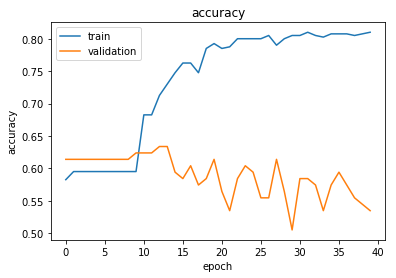

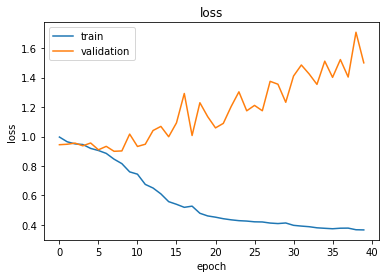

In [2]:
import numpy as np
import os
import random
import pickle
import matplotlib.pyplot as plt
import cv2


DATADIR = "data1\\train"

CATEGORIES = ["diabetic_retinopathy", "glaucoma", "healthy"]

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break
print(img_array)
print(img_array.shape)


IMG_SIZE = 50
training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                output = cv2.medianBlur(new_array, 5)
                th2 = cv2.adaptiveThreshold(output,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
                training_data.append([th2, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] 
y = [] 


for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_out = open("X1.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X1.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
###########################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model


X = pickle.load(open("X1.pickle", "rb"))
y = pickle.load(open("y1.pickle", "rb"))


X = X/255.0
y = np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))


model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


history = model.fit(X, y, batch_size=16, epochs=40, validation_split=0.2)

model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')